# Library

In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2
import os

In [2]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(9, 9))
  if ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

def masking(img):
  foreground_value = 255
  mask = np.uint8(img == foreground_value)

  labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
  largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
  img = np.zeros_like(img)
  img[labels == largest_label] = foreground_value
  # ShowImage('img',img,'rgb')
  return img

def caripixel(image):
    max1 = [256,0]
    max2 = [0,256]
    for i in range(len(image)):
        for j in range(len(image[i])):
            if(image[i,j] > 0):
                if(max1[0] > i):
                    max1[0] = i
                if(j > max1[1]):
                    max1[1] = j
                if(i > max2[0]):
                    max2[0] = i
                if(max2[1]>j):
                    max2[1] = j
    return [max1, max2]


def cropping(img,x1,x2,y1,y2):
  for y in range(256):
    for x in range(256):
        if x < x1 or x > x2:
            img[y][x] = 0
        if y > y1 or y < y2:
            img[y][x] = 0
  ShowImage('cropping',img,'rgb')          
  return img    

# [122, 164] [104, 93]
# [72, 214] [254, 53]
# [82:124][:,123:164]

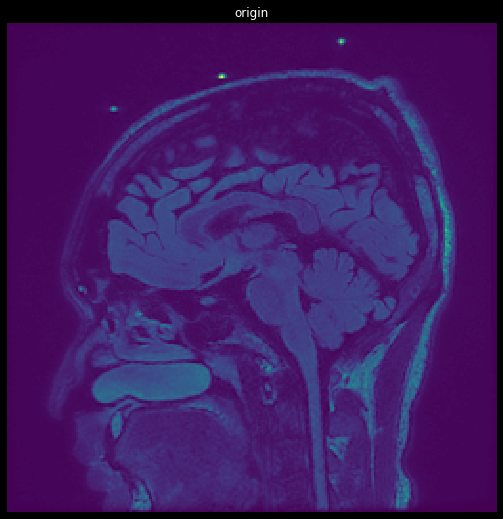

In [3]:
basepath ="C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\Simple_Brain_MRI_Segmentation\\dicom\\"
d = pydicom.read_file(basepath + "Z108")
file = np.array(d.pixel_array)
img = file
img_2d = img.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled
ShowImage('origin',hasil,'rgb')

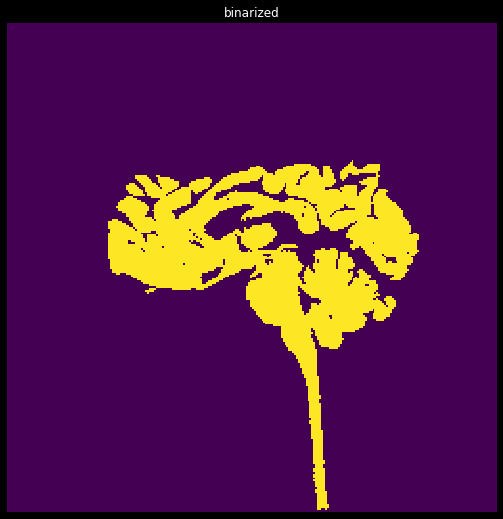

In [4]:
_,binarized = cv2.threshold(hasil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# masking(binarized)
foreground_value = 255
mask = np.uint8(binarized == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
binarized = np.zeros_like(binarized)
binarized[labels == largest_label] = foreground_value
ShowImage('binarized',binarized,'rgb')

In [5]:
batas = caripixel(binarized)
print(batas[0], batas[1])

[72, 214] [254, 53]


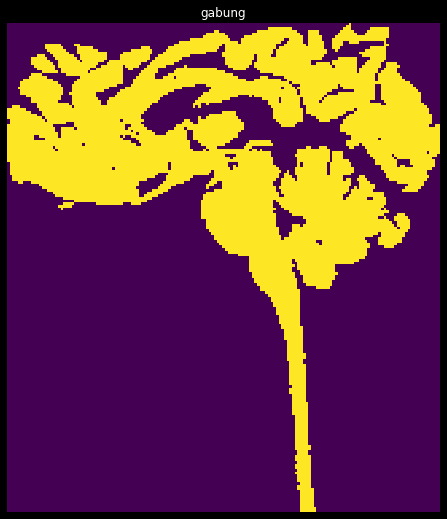

In [6]:
zoom_binarized = binarized[72:254][:,53:214]
ShowImage('gabung',zoom_binarized,'rgb')

In [7]:
# zoom_corpus = binarized[82:124][:,123:164]
# ShowImage('gabung',zoom_corpus,'rgb')

In [8]:
# erosion_size = 1
# kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
# erosion_dst = cv2.erode(zoom_corpus,kernel_erosion)

# foreground_value = 255
# mask = np.uint8(erosion_dst == foreground_value)

# labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
# largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
# erosion_dst = np.zeros_like(erosion_dst)
# erosion_dst[labels == largest_label] = foreground_value

# ShowImage('erosion_dst',erosion_dst, 'rgb')

In [9]:
# dilation_size = 1
# kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*dilation_size + 1, 2*dilation_size+1), (dilation_size, dilation_size))
# dilation_dst = cv2.dilate(erosion_dst,kernel_dilation)

# foreground_value = 255
# mask = np.uint8(dilation_dst == foreground_value)

# labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
# largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
# dilation_dst = np.zeros_like(dilation_dst)
# dilation_dst[labels == largest_label] = foreground_value
# ShowImage('dilation_dst',dilation_dst, 'rgb')

In [25]:
# for i in range(256):
#     for x in range(256):
#         if x < 122 or x > 164:
#             binarized[i][x] = 0
#         if i > 104 or i < 93:
#             binarized[i][x] = 0
    
# ShowImage('binarized',binarized, 'rgb')
# # [72, 214] [254, 53]
# # [82:124][:,123:164]

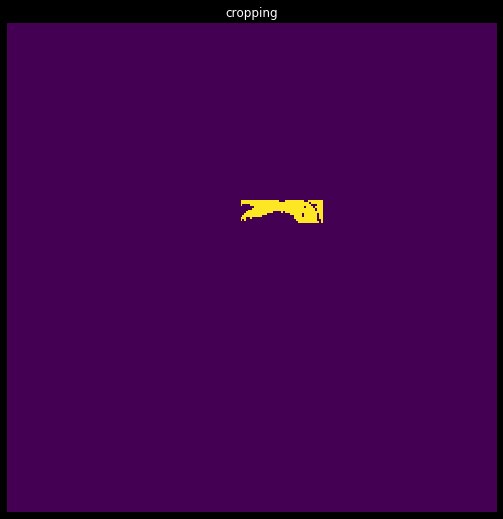

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
cropping(binarized,122,164,104,93)
# [122, 164] [104, 93]

# Cara Pertama

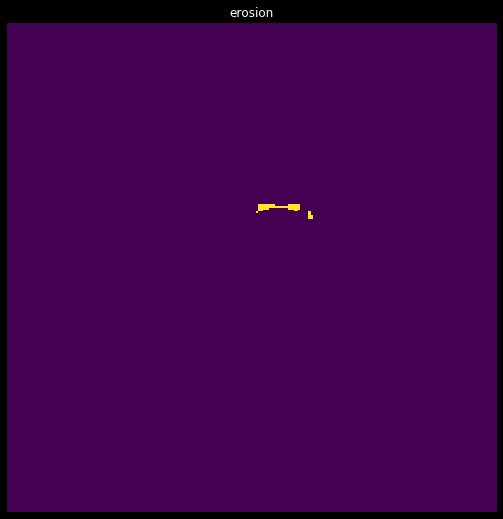

In [8]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(binarized,kernel,iterations = 1)
ShowImage('erosion',erosion, 'rgb')

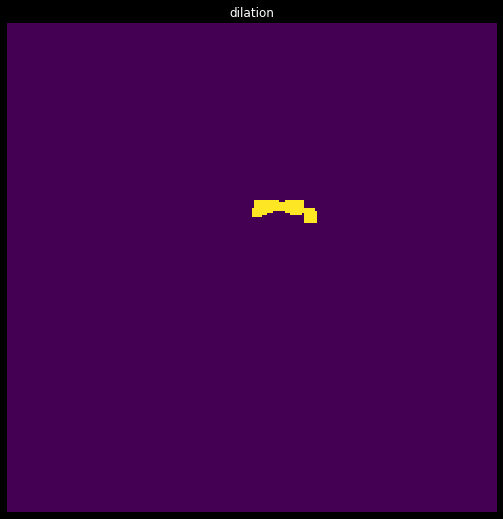

In [9]:
shape = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(erosion,shape,iterations = 1)
ShowImage('dilation',dilation, 'rgb')

# Cara Kedua

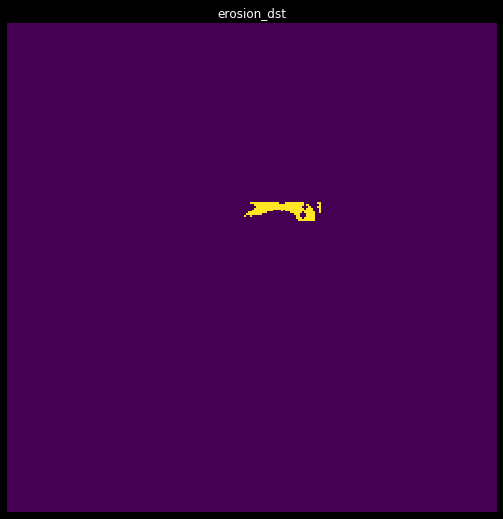

In [13]:
erosion_size = 1
kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
erosion_dst = cv2.erode(binarized,kernel_erosion)

ShowImage('erosion_dst',erosion_dst, 'rgb')

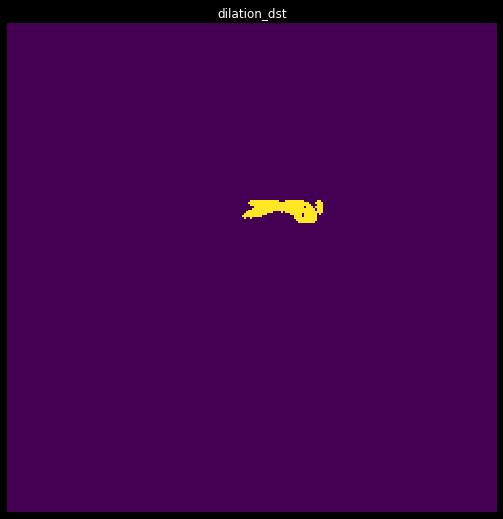

In [14]:
dilation_size = 1
kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*dilation_size + 1, 2*dilation_size+1), (dilation_size, dilation_size))
dilation_dst = cv2.dilate(erosion_dst,kernel_dilation)

ShowImage('dilation_dst',dilation_dst, 'rgb')

In [15]:
img_2d = file.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled

#Skull Stripping
skull_stripped_image = cv2.bitwise_and(hasil, hasil, mask = dilation_dst)
brain_pixels = skull_stripped_image[dilation_dst == foreground_value]

# Adapting the data to K-means
kmeans_input = np.float32(brain_pixels.reshape(brain_pixels.shape[0], brain_pixels.ndim))

# K-means parameters
epsilon = 0.01
number_of_iterations = 50
number_of_clusters = 4
number_of_repetition = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            number_of_iterations, epsilon)
flags = cv2.KMEANS_RANDOM_CENTERS

# K-means segmentation
_, labels, centers = cv2.kmeans(kmeans_input, number_of_clusters, None, criteria,number_of_repetition, flags)

# Adapting the labels
labels = labels.flatten('F')
for x in range(number_of_clusters):
    labels[labels == x] = centers[x]

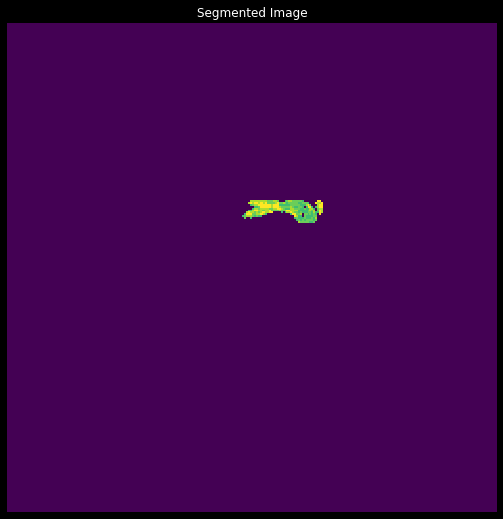

In [17]:
segmented_image = np.zeros_like(dilation_dst)
segmented_image[dilation_dst == foreground_value] = labels
ShowImage('Segmented Image',segmented_image,'rgb')

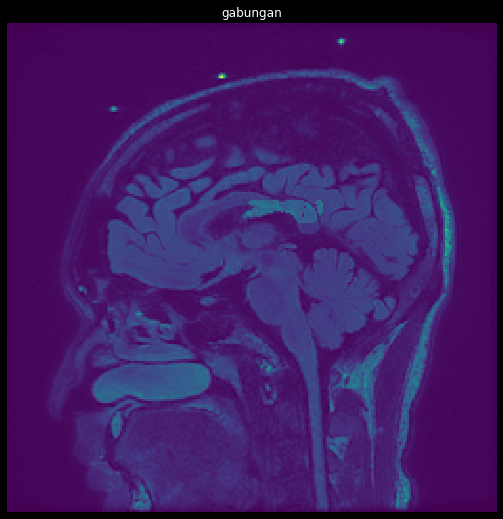

In [18]:
gabungan = segmented_image + hasil
ShowImage('gabungan',gabungan,'rgb')

# All in One Row

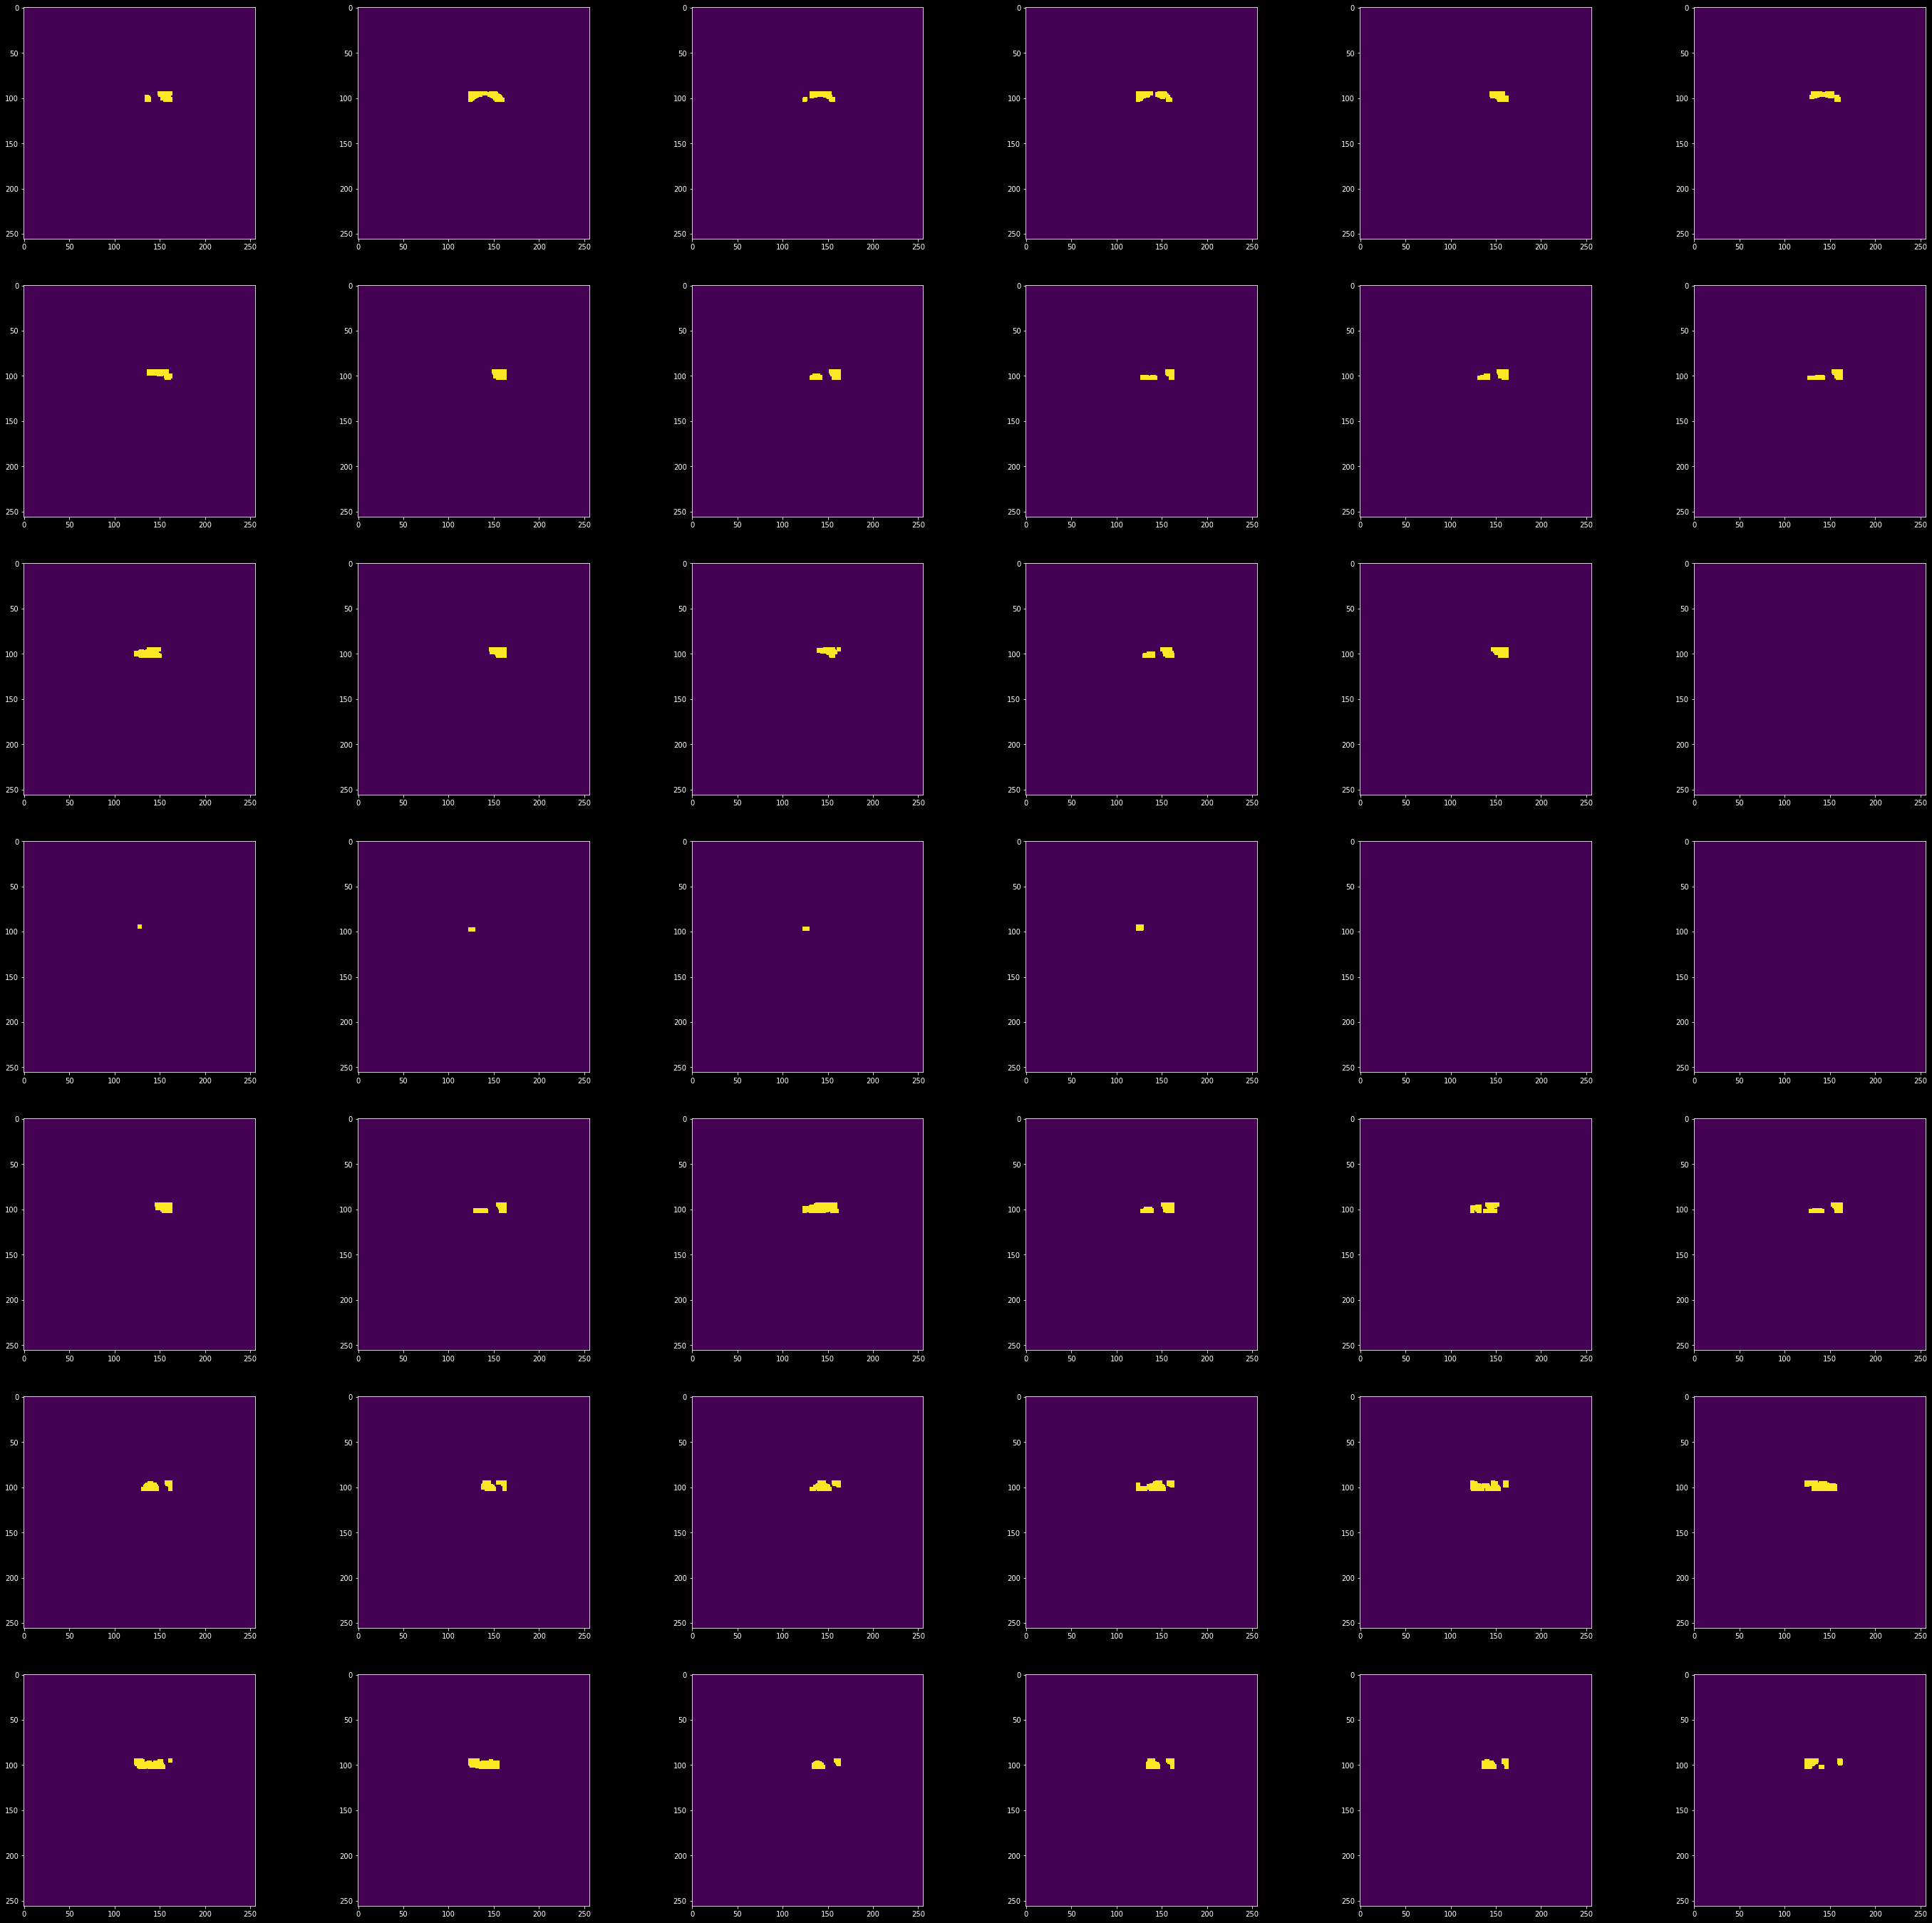

In [33]:
basepath ="C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\Simple_Brain_MRI_Segmentation\\dicom\\"
IMAGE_PATHS = os.listdir("C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\Simple_Brain_MRI_Segmentation\\dicom\\")

list_b = []
for f in IMAGE_PATHS:
    d = pydicom.read_file(basepath+f)
    a = np.array(d.pixel_array)
    img_2d = a.astype(float)
    img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
    img_2d_scaled = np.uint8(img_2d_scaled)
    hasil = img_2d_scaled

    _,binarized = cv2.threshold(hasil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    foreground_value = 255
    mask = np.uint8(binarized == foreground_value)

    labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
    binarized = np.zeros_like(binarized)
    binarized[labels == largest_label] = foreground_value

    # batas = caripixel(binarized)
    # print(batas[0], batas[1])
    # zoom_binarized = binarized[72:254][:,96:232]
    # cropping(binarized,122,164,104,93)

    for y1 in range(256):
        for x1 in range(256):
            if x1 < 122 or x1 > 164:
                binarized[y1][x1] = 0
            if y1 > 104 or y1 < 93:
                binarized[y1][x1] = 0

    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(binarized,kernel,iterations = 1)

    shape = np.ones((5, 5), np.uint8)
    dilation = cv2.dilate(erosion,shape,iterations = 1)

    # erosion_size = 1
    # kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
    # erosion_dst = cv2.erode(binarized,kernel_erosion)

    # dilation_size = 1
    # kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*dilation_size + 1, 2*dilation_size+1), (dilation_size, dilation_size))
    # dilation_dst = cv2.dilate(erosion_dst,kernel_dilation)

    # result = segmented_image + hasil

    # #Skull Stripping
    # skull_stripped_image = cv2.bitwise_and(hasil, hasil, mask = dilation_dst)
    # brain_pixels = skull_stripped_image[dilation_dst == foreground_value]

    # # Adapting the data to K-means
    # kmeans_input = np.float32(brain_pixels.reshape(brain_pixels.shape[0], brain_pixels.ndim))

    # # K-means parameters
    # epsilon = 0.01
    # number_of_iterations = 50
    # number_of_clusters = 4
    # number_of_repetition = 10
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
    #             number_of_iterations, epsilon)
    # flags = cv2.KMEANS_RANDOM_CENTERS

    # # K-means segmentation
    # _, labels, centers = cv2.kmeans(kmeans_input, number_of_clusters, None, criteria,number_of_repetition, flags)

    # # Adapting the labels
    # labels = labels.flatten('F')
    # for x in range(number_of_clusters):
    #     labels[labels == x] = centers[x]

    # segmented_image = np.zeros_like(dilation_dst)
    # segmented_image[dilation_dst == foreground_value] = labels

    list_b.append(dilation)
    
fig=plt.figure(figsize=(49, 49))
columns = 6
rows = 7
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_b[i])
plt.show()